In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [31]:
# Load data
df = pd.read_csv('ETH-USD.csv')

# Show first few rows
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [32]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index and sort
df.set_index('Date', inplace=True)
df = df.sort_index()

# Drop missing values
df = df.dropna()

# Keep only relevant columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984


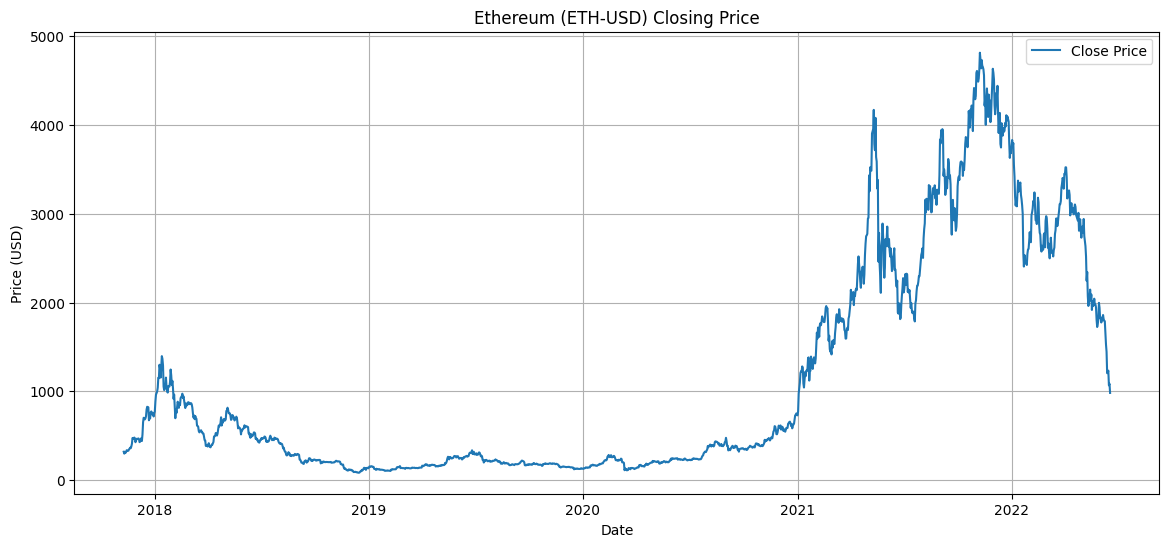

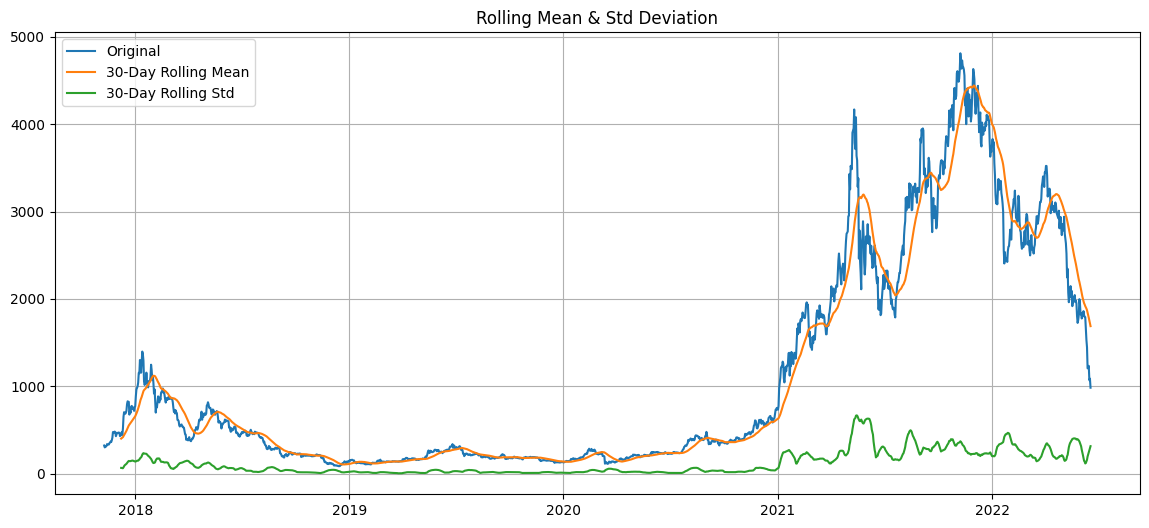

In [33]:
# Plot Closing Price
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Ethereum (ETH-USD) Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Rolling Mean and Std
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Original')
plt.plot(rolling_mean, label='30-Day Rolling Mean')
plt.plot(rolling_std, label='30-Day Rolling Std')
plt.legend()
plt.title('Rolling Mean & Std Deviation')
plt.grid()
plt.show()


In [34]:
# ADF Test on original data
result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Difference the series if not stationary
df['Close_diff'] = df['Close'].diff()

# Drop NA created by differencing
df.dropna(inplace=True)

# ADF Test on differenced data
result_diff = adfuller(df['Close_diff'])
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])


ADF Statistic: -1.3200256046080767
p-value: 0.6199615082922688
ADF Statistic (Differenced): -9.916659717026699
p-value (Differenced): 3.067256729678345e-17


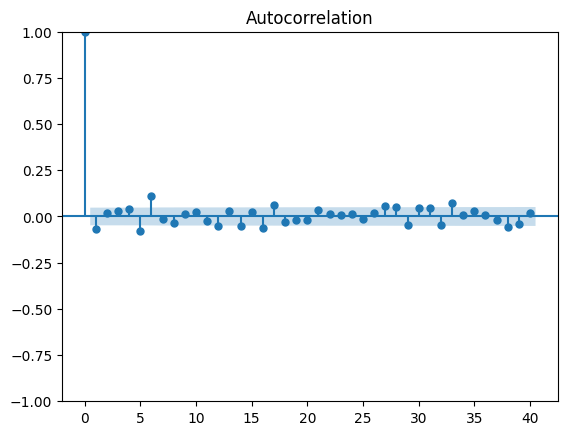

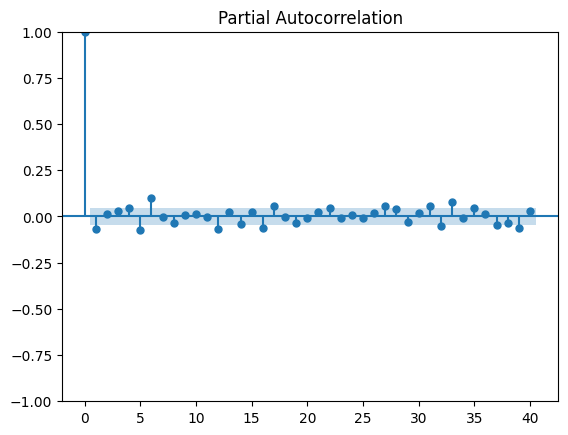

In [35]:
plot_acf(df['Close_diff'], lags=40)
plt.show()

plot_pacf(df['Close_diff'], lags=40)
plt.show()


In [36]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Close'], order=(1, 1, 0))

# Fit the ARIMA model
model_fit = model.fit() # This line is crucial!

# Now you can access the summary using model_fit
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1682
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -9761.001
Date:                Sat, 26 Apr 2025   AIC                          19526.002
Time:                        08:32:33   BIC                          19536.856
Sample:                    11-10-2017   HQIC                         19530.022
                         - 06-18-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0651      0.013     -5.031      0.000      -0.091      -0.040
sigma2      6477.0429     73.205     88.479      0.000    6333.565    6620.521
Ljung-Box (L1) (Q):                   0.00   Jarque-

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


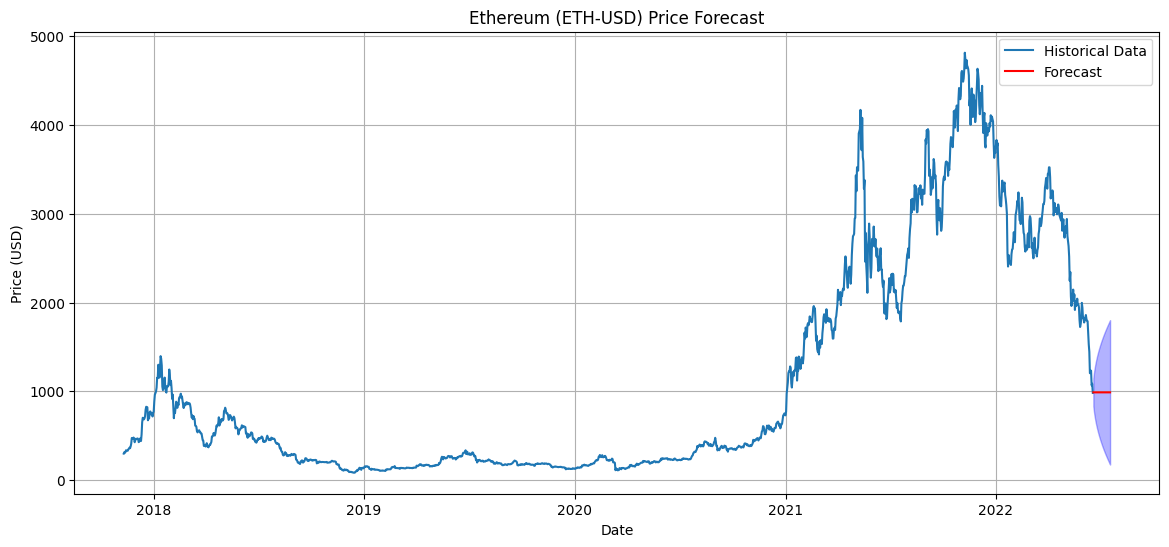

In [38]:

import matplotlib.pyplot as plt

forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotting the forecast
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Historical Data')
plt.plot(forecast_mean, label='Forecast', color='red')

# Shade the forecast area
plt.fill_between(forecast_mean.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='blue', alpha=0.3)

plt.title('Ethereum (ETH-USD) Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()
